<a href="https://colab.research.google.com/github/eminmdzd/Applied-Machine-Learning---Regularization-Naive-Bayes/blob/main/a0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Git and Drive Integration

In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import time

### Mount google drive

In [3]:
# Mount google drive to use a persistent directory structure
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Clone the assignment repository

In [4]:
# Create a directory for the course
%mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545

# Create files to hold your Github token and username.
!echo 'TOKEN' > /content/gdrive/MyDrive/ece5545/token.txt
!echo 'USERNAME' > /content/gdrive/MyDrive/ece5545/git_username.txt

# TODO: Navigate to the created files and replace the contents with your token and username.
# Do NOT place your token inside of the notebook. This way there is no risk that you will push it to your repo.
# Never share your token with anyone, it is basically your github password!

mkdir: cannot create directory ‘/content/gdrive/MyDrive/ece5545’: File exists
/content/gdrive/MyDrive/ece5545


In [5]:
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
with open('/content/gdrive/MyDrive/ece5545/git_username.txt') as f:
    handle = f.readline().strip()

YOUR_TOKEN = token
YOUR_HANDLE = handle

!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a0-{YOUR_HANDLE}.git a0

fatal: destination path 'a0' already exists and is not an empty directory.


### Add `src` directory to the Python import path

In [6]:
# import functions from the src directory in repo
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/ece5545/a0/src')

### Import functions from `src/train_utils.py`

In [7]:
import train_utils
from model import *

### Make changes to `src` files and push to repo

In [8]:
# You will likely need to set your git user identification settings
!git config --global user.email "em876@cornell.edu"  # update with your email
!git config --global user.name "Emin Mamedzade"   # update with your name

In [9]:
# To run the same tests that are run on Github Classroom
%cd /content/gdrive/MyDrive/ece5545/a0
!python3 -m pytest

/content/gdrive/MyDrive/ece5545/a0
======================================= test session starts ========================================
platform linux -- Python 3.11.11, pytest-8.3.4, pluggy-1.5.0
rootdir: /content/gdrive/MyDrive/ece5545/a0
plugins: anyio-3.7.1, langsmith-0.3.2, typeguard-4.4.1
collected 1 item                                                                                   

tests/test_model.py .                                                                        [100%]

======================================== 1 passed in 6.34s =========================================


In [10]:
%cd /content/gdrive/MyDrive/ece5545/a0/src
# Navigate to a0/src/model.py and fix the bug (denoted by TODO)
# in the file then commit the changes below
!git commit -am "fixed bug in model.py"
!git push

/content/gdrive/MyDrive/ece5545/a0/src
^C
Everything up-to-date


## Training Configuration

In [11]:
batch_size = 128
epochs = 5
lr = 1.0
gamma = 0.7
# cuda flag
no_cuda = True
seed = 42
log_interval = 50
save_model = False
dry_run = False

# Derived parameters
use_cuda = not no_cuda and torch.cuda.is_available()
torch.manual_seed(seed)

# switched between cuda and cpu
device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': batch_size}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

## Data Loaders and Optimizer Setup

In [12]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('/content/gdrive/MyDrive/ece5545/data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('/content/gdrive/MyDrive/ece5545/data', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

model = Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=lr)

scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.325583
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.392409
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.416211
Train Epoch: 1 [4800/60000 (8%)]	Loss: 0.212256
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.126978
Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.233047
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.061988
Train Epoch: 1 [11200/60000 (19%)]	Loss: 0.300714
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.106217
Train Epoch: 1 [14400/60000 (24%)]	Loss: 0.105495
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.188132
Train Epoch: 1 [17600/60000 (29%)]	Loss: 0.092725
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.107890
Train Epoch: 1 [20800/60000 (35%)]	Loss: 0.034718
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.085291
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.049568
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.066630
Train Epoch: 1 [27200/60000 (45%)]	Loss: 0.193480
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.096180
Train Epoch: 1 [30400/60000 (51%)]	Loss: 0.193055
Train Epoch: 1

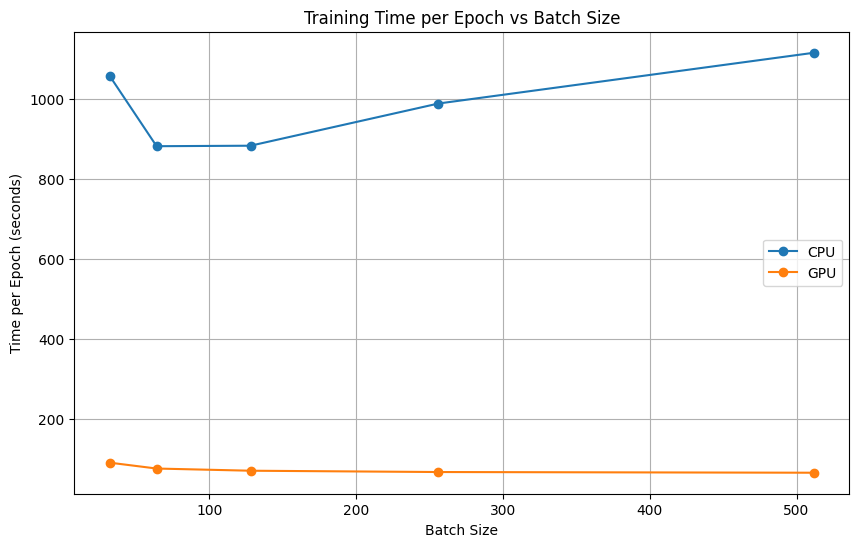

In [13]:
# Updated batch sizes

import importlib
importlib.reload(train_utils)


import time
import matplotlib.pyplot as plt

# Define a list of batch sizes to test
batch_sizes = [32, 64, 128, 256, 512]

# Initialize lists to store the time taken for each batch size on CPU and GPU
cpu_times = [1058.08, 882.32, 883.55, 988.93, 1115.82]
gpu_times = []

# Training configuration
epochs = 5
lr = 1.0
gamma = 0.7
seed = 42
log_interval = 50
save_model = False
dry_run = False

# Function to train the model and measure time
def train_and_measure_time(device, batch_size):
    torch.manual_seed(seed)
    train_kwargs = {'batch_size': batch_size}
    test_kwargs = {'batch_size': batch_size}
    if device == "cuda":
        cuda_kwargs = {'num_workers': 1, 'pin_memory': True, 'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    dataset1 = datasets.MNIST('/content/gdrive/MyDrive/ece5545/data', train=True, download=True, transform=transform)
    dataset2 = datasets.MNIST('/content/gdrive/MyDrive/ece5545/data', train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    model = Net().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=lr)
    scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

    start_time = time.time()
    for epoch in range(1, epochs + 1):
        train_utils.train(model, device, train_loader, optimizer, epoch, log_interval, dry_run)
        train_utils.test(model, device, test_loader)
        scheduler.step()
    end_time = time.time()

    return end_time - start_time

# # Measure time for CPU
# device = torch.device("cpu")
# for batch_size in batch_sizes:
#     time_taken = train_and_measure_time(device, batch_size)
#     cpu_times.append(time_taken)
#     print(f"CPU - Batch Size: {batch_size}, Time Taken: {time_taken:.2f} seconds")

# Measure time for GPU
device = torch.device("cuda")
for batch_size in batch_sizes:
    time_taken = train_and_measure_time(device, batch_size)
    gpu_times.append(time_taken)
    print(f"GPU - Batch Size: {batch_size}, Time Taken: {time_taken:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, cpu_times, label='CPU', marker='o')
plt.plot(batch_sizes, gpu_times, label='GPU', marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Time per Epoch (seconds)')
plt.title('Training Time per Epoch vs Batch Size')
plt.legend()
plt.grid(True)
plt.show()

## Training Loop

In [12]:
import importlib
importlib.reload(train_utils)
# we use importlib to make sure that we are loading
# the latest version of train_utils after any changes
# that you may have done

for epoch in range(1, epochs + 1):
    train_utils.train(model, device, train_loader, optimizer, epoch, log_interval, dry_run)
    train_utils.test(model, device, test_loader)
    scheduler.step()

if save_model:
    torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.319993
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.380766
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.170312


KeyboardInterrupt: 

In [14]:
# Diagnostic information about the used GPU device
!nvidia-smi

Fri Jan 31 18:47:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   70C    P0             30W /   70W |    1210MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [23]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [21]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

In [27]:
!lscpu | grep "L3 cache"

L3 cache:                             55 MiB (1 instance)
